# 1-D Exploratory Data Analysis: U.S. Power Plants Data

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [47]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [49]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [50]:
eji = pd.read_csv('EJI_2024_United_States.csv')

In [51]:
eji[eji['GEOID_2020'] == 36093032502]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag
77261,36,93,32502,140000US36093032502,36093032502,36093032502,Schenectady County,New York,NY,Census Tract 325.02; Schenectady County; New York,2934,298,3723,0.7968,0.2091,0.5968,0.2066,1.1936,0.176,5.9,0.0764,0.0764,0.0764,5.4638,0.0313,5.0,0.2895,6.3,0.6666,6.9,0.067,13.8,0.1349,0.5,0.02,7.2,0.3396,1.5489,0.1016,25.3,0.8692,27.2,0.8111,9.2,0.2533,0.8,0.4212,2.3548,0.7838,0.0,0.0,6.7,0.9282,0.9282,0.6029,4.9083,0.1992,0.091,0.3188,0.0,0.0,0.127,0.2385,20,0.0434,0.6007,0.1309,0.0,0.0,0.0,0.0,100.0,0.8446,0.0,0.0,0.0,0.0,0.0,0,0.8446,0.3699,99.5891,0.571,89.8,0.8983,12.0833,0.3073,1.7766,0.6325,66.7526,0.6655,98.3686,0.5708,47.7513,0.9594,2.1957,0.9656,0.0,0.0,0,0.0,0.0,5.4176,0.3976,10.0,0.3285,0,11.2,0.9139,1,7.2,0.5546,0,13.6,0.1409,0,9.6,0.2057,0,1,0.2,16.8,0.8091,0.8091,0.8091,0.0,0.0,7.1,0.3827,0.3827,0.3796,0.0,0.0,1,0.0,0.0,0,0.0468,0.5063,9,1.9167,0.4929,9,1.3758,0.3857,9,0.0,0.0,0,1.3849,0.3026,2.5767,0.3968,1,0.0,77,2.6,32,1.1,0,0.0,0,0.0,63,2.1,0,0.0,0.0,-999,-999


In [99]:
plants = pd.read_csv('plants_with_geos.csv')

In [100]:
plants.head()

,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
0,0,0,(3K) 59 Hetcheltown Rd,66729,NY,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-73.91048,42.87657&level=14",-73.910480,42.876570,3.609303e+10,36.0,93.0,32502.0
1,1,1,0 Hammond St CSG,64876,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-70.726675,41.808547&level=14",-70.726675,41.808547,2.502354e+10,25.0,23.0,544200.0
2,2,2,1 Commercial,67464,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-71.237,42.115&level=14",-71.237000,42.115000,2.502141e+10,25.0,21.0,414100.0
3,3,3,"10 Briggs Solar NG, LLC (East)",62781,RI,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-71.49625,41.63269&level=14",-71.496250,41.632690,4.400302e+10,44.0,3.0,20903.0
4,4,4,"10 Finderne Avenue Solar, LLC",64023,NJ,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-74.57594,40.55812&level=14",-74.575940,40.558120,3.403505e+10,34.0,35.0,51000.0


In [101]:
plants.shape

(12661, 20)

In [55]:
plants['plant_name'].nunique()

12633

In [102]:
plants['GEOID'] = plants['GEOID'].astype('Int64').astype(str).str.zfill(11)

In [21]:
# plants['GEOID'] = plants['GEOID'].apply(
#     lambda x: str(int(float(x))).zfill(11) if pd.notnull(x) else x
# )

In [103]:
plants.head()

,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
0,0,0,(3K) 59 Hetcheltown Rd,66729,NY,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-73.91048,42.87657&level=14",-73.910480,42.876570,36093032502,36.0,93.0,32502.0
1,1,1,0 Hammond St CSG,64876,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-70.726675,41.808547&level=14",-70.726675,41.808547,25023544200,25.0,23.0,544200.0
2,2,2,1 Commercial,67464,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-71.237,42.115&level=14",-71.237000,42.115000,25021414100,25.0,21.0,414100.0
3,3,3,"10 Briggs Solar NG, LLC (East)",62781,RI,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-71.49625,41.63269&level=14",-71.496250,41.632690,44003020903,44.0,3.0,20903.0
4,4,4,"10 Finderne Avenue Solar, LLC",64023,NJ,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-74.57594,40.55812&level=14",-74.575940,40.558120,34035051000,34.0,35.0,51000.0


In [104]:
missing_geoids = df['GEOID'].isna().sum()
print("Number of missing GEOID values:", missing_geoids)

Number of missing GEOID values: 0


In [106]:
# Count rows where GEOID is exactly the string "0000000<NA>"
count = (df['GEOID'] == "<NA>").sum()
print("Number of rows with GEOID as '0000000<NA>':", count)

Number of rows with GEOID as '0000000<NA>': 18


In [107]:
plants['GEOID'].value_counts()

GEOID
06029006012    38
06065046900    27
06037900901    25
06029003304    25
06029005514    25
               ..
05023480301     1
29095013502     1
39037555102     1
21089040501     1
42043020100     1
Name: count, Length: 7796, dtype: int64

In [108]:
plants[plants['GEOID'] == '06029006012']

,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
90,90,90,85 A,52162,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.324772,35.095797&level=14",-118.324772,35.095797,06029006012,6.0,29.0,6012.0
91,91,91,85 B,52163,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.332533,35.102577&level=14",-118.332533,35.102577,06029006012,6.0,29.0,6012.0
378,378,378,Alta Wind Energy Center I,57282,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.353422,35.033725&level=14",-118.353422,35.033725,06029006012,6.0,29.0,6012.0
379,379,379,Alta Wind Energy Center II,57291,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.295278,35.023889&level=14",-118.295278,35.023889,06029006012,6.0,29.0,6012.0
380,380,380,Alta Wind Energy Center III,57292,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.295278,35.023889&level=14",-118.295278,35.023889,06029006012,6.0,29.0,6012.0
385,385,385,Alta Wind XI,58395,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.39,35.065&level=14",-118.390000,35.065000,06029006012,6.0,29.0,6012.0
1797,1797,1797,CTV Power Purchase Contract Trust,54300,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.3083,35.0583&level=14",-118.308300,35.058300,06029006012,6.0,29.0,6012.0
1879,1879,1879,Cameron Ridge LLC,10586,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.3158,35.075&level=14",-118.315800,35.075000,06029006012,6.0,29.0,6012.0
2569,2569,2569,Coram Energy LLC,54299,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.3417,35.075&level=14",-118.341700,35.075000,06029006012,6.0,29.0,6012.0
2570,2570,2570,Coram Energy LLC (ECT),54298,CA,IPP Non-CHP,WT,WND,Onshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-118.3417,35.0583&level=14",-118.341700,35.058300,06029006012,6.0,29.0,6012.0


In [109]:
# Ensure 'GEOID' is treated as a string
plants['GEOID'] = plants['GEOID'].astype(str)

# Find rows where 'GEOID' starts with '0'
plants_with_leading_zeros = plants[plants['GEOID'].str.startswith('0')]

# Remove the leading '0' from those 'GEOID' values
plants_with_leading_zeros['GEOID'] = plants_with_leading_zeros['GEOID'].str.lstrip('0')

# Now replace the old GEOID values in the original DataFrame
plants.update(plants_with_leading_zeros)

# Display the updated DataFrame
plants

,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
0,0,0,(3K) 59 Hetcheltown Rd,66729,NY,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-73.91048,42.87657&level=14",-73.910480,42.876570,36093032502,36.0,93.0,32502.0
1,1,1,0 Hammond St CSG,64876,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-70.726675,41.808547&level=14",-70.726675,41.808547,25023544200,25.0,23.0,544200.0
2,2,2,1 Commercial,67464,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-71.237,42.115&level=14",-71.237000,42.115000,25021414100,25.0,21.0,414100.0
3,3,3,"10 Briggs Solar NG, LLC (East)",62781,RI,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-71.49625,41.63269&level=14",-71.496250,41.632690,44003020903,44.0,3.0,20903.0
4,4,4,"10 Finderne Avenue Solar, LLC",64023,NJ,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-74.57594,40.55812&level=14",-74.575940,40.558120,34035051000,34.0,35.0,51000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,12656,12656,Pawnee,6248,CO,Electric Utility,ST,SUB,Conventional Steam Coal,1970,0,1970,Coal,"map/?center=-103.6803,40.2217&level=14",-103.680300,40.221700,8087000800,8.0,87.0,800.0
12657,12657,12657,Pawpaw Solar Plant,59894,GA,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-84.256778,32.572875&level=14",-84.256778,32.572875,13269950301,13.0,269.0,950301.0
12658,12658,12658,Paxton Creek Cogeneration,50373,PA,IPP CHP,IC,NG,Natural Gas Internal Combustion Engine,NaN,NaN,NaN,Natural Gas,"map/?center=-76.8771,40.2653&level=14",-76.877100,40.265300,42043020100,42.0,43.0,20100.0
12659,12659,12659,Payne Creek Solar,61665,FL,Electric Utility,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-81.964222,27.664583&level=14",-81.964222,27.664583,12105016100,12.0,105.0,16100.0


In [1]:
#plants[plants['GEOID'] == '6029006012']

In [110]:
plants[plants['plant_name'] == 'Amistad Dam & Power']

,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
459,459,459,Amistad Dam & Power,6128,TX,Electric Utility,HY,WAT,Conventional Hydroelectric,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-101.06011,29.449827&level=14",-101.06011,29.449827,<NA>,NaN,NaN,NaN


In [111]:
plants['GEOID'].dtype

dtype('O')

In [64]:
eji['GEOID'] = eji['GEOID'].astype(str)

In [71]:
eji[eji['GEOID'] == '6029006012']

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag
5500,6,29,6012,140000US06029006012,6029006012,6029006012,Kern County,California,CA,Census Tract 60.12; Kern County; California,3182,657,1844,1.8053,0.7696,1.2053,0.6699,2.7049,0.9053,19.5,0.3247,0.3247,0.3247,37.8156,0.6902,7.7,0.4532,8.2,0.7926,15.9,0.2416,30.8,0.6829,3.3,0.2234,14.0,0.6464,3.7303,0.5577,22.5,0.7918,19.4,0.3586,10.9,0.3752,1.8,0.5723,2.0979,0.5929,8.1,0.7618,1.7,0.7599,1.5217,0.8942,7.6746,0.6552,9.948,0.9868,1.458,0.9159,0.0443,0.0285,20,0.0434,1.9746,0.6788,0.0,0.0,2.7321,0.3758,2.5817,0.4909,0.0,0.0,0.0,0.0,0.0,0,0.8667,0.4047,68.5712,0.7271,16.5,0.1371,3.5833,0.9698,1.834,0.6808,11.0883,0.4205,9.4585,0.161,2.365,0.857,1.4385,0.8643,0.0,0.0,0,0.0,0.0,6.1138,0.5501,10.9,0.595,0,10.1,0.8054,1,8.7,0.7836,1,17.5,0.5674,0,13.8,0.6922,1,3,0.6,19.0,0.9305,0.9305,0.9305,0.0,0.0,13.4,0.7445,0.7445,0.7372,0.0,0.0,1,82.0909,0.9946,9,0.0,0.0,1,5.5,0.9256,9,0.0952,0.081,9,0.0,0.0,0,2.0012,0.5976,3.6762,0.8996,11,0.3,532,16.7,19,0.6,36,1.1,0,0.0,21,0.7,0,0.0,0.0,-999,-999


In [112]:
df = pd.merge(eji, plants, on="GEOID", how="outer")

In [113]:
pd.set_option('display.max_columns', None)

In [114]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT
0,10.0,1.0,40100.0,140000US10001040100,10001040100,1.000104e+10,Kent County,Delaware,DE,Census Tract 401; Kent County; Delaware,7343.0,882.0,2855.0,0.9588,0.3030,0.7588,0.3220,1.7110,0.4451,18.8,0.3142,0.3142,0.3142,22.4347,0.3828,10.2,0.5751,6.4,0.675,14.0,0.2018,20.5,0.3654,3.6,0.2498,7.6,0.3606,2.8105,0.3421,14.3,0.3855,27.0,0.8032,14.1,0.5907,2.4,0.6287,2.4081,0.8160,22.9,0.9137,0.0,0.0000,0.9137,0.5878,6.4465,0.4406,0.365,0.6153,0.0,0.0,0.1182,0.2124,20.0,0.0434,0.8711,0.2485,0.1812,0.9257,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.9257,0.4162,99.9998,0.5517,23.0,0.1834,3.4444,0.9748,1.7099,0.5709,0.0000,0.0000,4.9654,0.1320,0.9892,0.8372,0.9692,0.4497,0.606,0.5750,0.0,0.5750,0.5750,5.0509,0.3182,12.2,0.8686,1.0,9.0,0.6320,0.0,7.3,0.5726,0.0,17.4,0.5557,0.0,12.8,0.5925,0.0,1.0,0.2,8.4,0.1951,0.1951,0.1951,0.0,0.0,7.1,0.3827,0.3827,0.3796,0.010,0.0360,9.0,5.7273,0.3153,9.0,0.1052,0.6608,9.0,1.5417,0.3903,9.0,5.288,0.7768,9.0,0.0556,0.5198,9.0,2.6990,0.8823,3.2768,0.7522,505.0,6.9,509.0,6.9,107.0,1.5,4.0,0.1,0.0,0.0,243.0,3.3,13.0,0.2,0.056753,Lenape Indian Tribe of Delaware SDTSA,0.0,1252.0,1252.0,Blue Hen Solar,65791.0,DE,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-75.68538,39.18568&level=14",-75.685380,39.185680,10.0,1.0,40100.0
1,10.0,1.0,40201.0,140000US10001040201,10001040201,1.000104e+10,Kent County,Delaware,DE,Census Tract 402.01; Kent County; Delaware,5132.0,524.0,9054.0,1.1657,0.4323,0.9657,0.4892,1.7197,0.4501,40.8,0.5834,0.5834,0.5834,16.8532,0.2570,5.4,0.3154,7.4,0.747,31.5,0.5269,17.7,0.2628,6.4,0.4713,4.1,0.1766,2.7570,0.3306,11.0,0.2173,28.1,0.8449,13.0,0.5203,0.0,0.0000,1.5825,0.2011,4.8,0.6991,0.1,0.3697,1.0688,0.7033,5.9917,0.3636,0.365,0.6153,0.0,0.0,0.1646,0.3494,20.0,0.0434,1.0081,0.3095,41.2434,0.9764,82.8961,0.7699,0.0,0.0,58.3930,0.9152,0.0,0.0,0.0,0.0,2.6615,0.9474,100.0000,0.5514,37.5,0.3079,7.4583,0.6182,1.4775,0.3313,64.3592,0.6576,7.9819,0.1514,0.0000,0.0000,0.8090,0.3777,0.333,0.4021,0.0,0.4021,0.4021,6.3582,0.6021,12.1,0.8555,1.0,6.9,0.3563,0.0,5.3,0.1962,0.0,17.3,0.5438,0.0,11.1,0.3861,0.0,1.0,0.2,8.4,0.1951,0.1951,0.1

In [115]:
df.tail()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT
90168,9.0,190.0,257100.0,140000US9190257100,9190257100,9.001257e+09,Western Connecticut Planning Region,Connecticut,CT,Census Tract2571;Western Connecticut Planning ...,3499.0,194.0,1677.0,0.4867,0.0747,0.2867,0.0515,1.4208,0.2860,16.2,0.2732,0.2732,0.2732,8.1737,0.0732,3.2,0.1712,3.8,0.4017,8.3,0.0888,18.1,0.2772,2.6,0.1634,10.0,0.4787,1.6542,0.1173,28.6,0.9232,14.9,0.1534,10.8,0.3679,0.2,0.2539,1.6984,0.2692,1.4,0.5727,0.0,0.0,0.5727,0.3106,4.1985,0.1125,0.457,0.6724,0.0,0.0,0.1157,0.2051,20.0,0.0434,0.9209,0.2700,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,100.0000,0.5514,64.7,0.6035,5.9352,0.7784,1.9333,0.7553,1.1748,0.3423,0.0000,0.0000,8.7263,0.8969,1.2392,0.5894,0.070,0.1941,0.0,0.1941,0.1941,4.2875,0.1742,10.3,0.4145,0.0,11.4,0.9251,1.0,7.2,0.5546,0.0,12.6,0.0759,0.0,8.8,0.1298,0.0,1.0,0.2,16.6,0.7950,0.7950,0.7950,0.0,0.0,8.1,0.5417,0.5417,0.5375,0.0,0.0,0.0,5.0909,0.2905,9.0,0.1227,0.6908,9.0,3.5833,0.7905,9.0,4.7347,0.7289,9.0,0.0000,0.0,0.0,2.5007,0.8006,3.8374,0.9341,25.0,0.7,270.0,7.7,54.0,1.5,0.0,0.0,0.0,0.0,84.0,2.4,133.0,3.8,0.0,-999,-999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90169,9.0,190.0,425700.0,140000US9190425700,9190425700,9.005426e+09,Western Connecticut Planning Region,Connecticut,CT,Census Tract4257;Western Connecticut Planning ...,5217.0,719.0,9704.0,1.0932,0.3872,0.8932,0.4305,2.0037,0.6099,23.9,0.3903,0.3903,0.3903,18.2254,0.2874,2.2,0.1073,4.8,0.5218,38.0,0.6158,26.7,0.5741,4.4,0.3188,6.1,0.2820,2.7072,0.3194,12.2,0.2745,21.0,0.4592,13.6,0.5597,0.4,0.3193,1.6127,0.2170,1.3,0.5656,0.0,0.0,0.5656,0.3078,5.2758,0.2521,0.365,0.6153,0.0,0.0,0.1254,0.2334,20.0,0.0434,0.8921,0.2574,0.0,0.0,66.7098,0.7166,55.1912,0.7113,0.0,0.0,0.0,0.0,0.0,0.0,1.4279,0.5892,99.8859,0.5619,63.4,0.5885,6.3806,0.7306,1.8810,0.7170,88.1369,0.7397,67.6651,0.4262,0.1281,0.8122,1.9781,0.9424,0.285,0.3669,0.0,0.3669,0.3669,6.5460,0.6411,11.4,0.7278,1.0,8.6,0.5721,0.0,5.7,0.2670,0.0,15.4,0.3154,0.0,9.2,0.1651,0.0,1.0,0.2,16.4,0.7807,0.7807,0.7807,0.0,0.0,7.8,0.4978,0.4978,0.4939,0.0,0.0,1.0,5.0909,0.2905,9.0,0.1227,0.6908,9.0,3.1250,0.7273,9.0

In [120]:
df[df['GEOID'].isna()] 

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT


In [121]:
df[df['GEOID'] == '<NA>']

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT
90170,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,459.0,459.0,Amistad Dam & Power,6128.0,TX,Electric Utility,HY,WAT,Conventional Hydroelectric,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-101.06011,29.449827&level=14",-101.060110,29.449827,NaN,NaN,NaN
90171,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2421.0,2421.0,Coastal Virginia Offshore Wind (CVOW) Pilot Pr...,59693.0,VA,Electric Utility,WS,WND,Offshore Wind Turbine,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-75.4916,36.89155&level=14",-75.491600,36.891550,NaN,NaN,NaN
90172,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [122]:
df[df['GEOID'] == '<NA>']['State'].value_counts()

State
TX    1
VA    1
NY    1
Name: count, dtype: int64

In [123]:
df[(df['GEOID'] == '<NA>')&(df['State'] == 'MD')]

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0.1,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT


In [124]:
df.shape

(90173, 189)

In [125]:
df['plant_name'].nunique()

12633

In [128]:
df['contains_energy_source'] = df['Plant Code'].notna().astype(int)

In [130]:
df['Primary Technology'].value_counts()

Primary Technology
Solar Photovoltaic                             5326
Conventional Hydroelectric                     1391
Onshore Wind Turbine                           1297
Multiple                                        898
Petroleum Liquids                               795
Natural Gas Fired Combustion Turbine            604
Natural Gas Fired Combined Cycle                433
Natural Gas Internal Combustion Engine          297
Landfill Gas                                    291
Batteries                                       232
Conventional Steam Coal                         164
Wood/Wood Waste Biomass                         159
--                                              151
Other Natural Gas                               135
Natural Gas Steam Turbine                       133
Other Waste Biomass                              78
Geothermal                                       59
Municipal Solid Waste                            57
Nuclear                                      

## Creating categories for various types of powerplants

In [131]:
def map_technology_category(tech):
    if pd.isna(tech):
        return 'None'
    elif tech in ['Solar Photovoltaic', 'Solar Thermal with Energy Storage', 'Solar Thermal without Energy Storage']:
        return 'Solar'
    elif tech in ['Onshore Wind Turbine', 'Offshore Wind Turbine']:
        return 'Wind'
    elif tech in ['Conventional Hydroelectric', 'Hydroelectric Pumped Storage']:
        return 'Hydroelectric'
    elif tech in ['Wood/Wood Waste Biomass', 'Other Waste Biomass', 'Landfill Gas']:
        return 'Biomass'
    elif tech in ['Natural Gas Fired Combustion Turbine', 'Natural Gas Fired Combined Cycle', 
                  'Natural Gas Internal Combustion Engine', 'Other Natural Gas', 'Natural Gas Steam Turbine']:
        return 'Natural Gas'
    elif tech in ['Conventional Steam Coal', 'Coal Integrated Gasification Combined Cycle']:
        return 'Coal'
    elif tech == 'Nuclear':
        return 'Nuclear'
    elif tech in ['Petroleum Liquids', 'Petroleum Coke']:
        return 'Petroleum'
    else:
        return 'Other'

# Apply the updated function
df['Technology_Category'] = df['Primary Technology'].apply(map_technology_category)

In [132]:
df['Technology_Category'].value_counts()

Technology_Category
None             77512
Solar             5335
Natural Gas       1602
Other             1468
Hydroelectric     1416
Wind              1299
Petroleum          800
Biomass            528
Coal               165
Nuclear             48
Name: count, dtype: int64

In [133]:
category_order = ['None', 'Solar', 'Natural Gas', 'Wind', 'Hydroelectric', 'Other', 'Petroleum', 'Biomass', 'Coal', 'Nuclear']

# Create a dictionary mapping category to number
category_to_number = {category: idx for idx, category in enumerate(category_order)}

# Map the Technology_Category to its corresponding number
df['Category_Number'] = df['Technology_Category'].map(category_to_number)

In [134]:
df['Category_Number'].value_counts()

Category_Number
0    77512
1     5335
2     1602
5     1468
4     1416
3     1299
6      800
7      528
8      165
9       48
Name: count, dtype: int64

In [135]:
df['contains_energy_source'].value_counts()

contains_energy_source
0    77512
1    12661
Name: count, dtype: int64

In [136]:
df['energy_category'].value_counts()

energy_category
Renewable Energy Sources    8694
Natural Gas                 1602
Other                       1352
Petroleum                    800
Coal                         165
Nuclear                       48
Name: count, dtype: int64

## Creating categories for fossil fuel and renewable energy power plants

In [137]:
df['fossil_fuels'] = df['energy_category'].apply(lambda x: 1 if x in ['Natural Gas', 'Petroleum', 'Coal'] else 0)

df['renewables'] = df['energy_category'].apply(lambda x: 1 if x == 'Renewable Energy Sources' else 0)

In [138]:
# Define the mapping of categories to values, including 0 for missing/NA values
category_map = {
    'Renewable Energy Sources': 1,
    'Natural Gas': 2,
    'Petroleum': 3,
    'Coal': 4,
    'Other': 5
}

# Apply the mapping to create a new column, with 0 for NaN values
df['energy_category_numeric'] = df['energy_category'].map(category_map).fillna(0)


In [139]:
df.replace(-999, pd.NA, inplace=True)

In [140]:
df.shape

(90173, 195)

In [141]:
df.to_csv('plants_merged_eji.csv', index=False)

In [142]:
%%R
 
# Import data with R
df <- read_csv('plants_merged_eji.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 195
  STATEFP COUNTYFP TRACTCE AFFGEOID          GEOID GEOID_2020 COUNTY_x StateDesc
    <dbl>    <dbl>   <dbl> <chr>             <chr>      <dbl> <chr>    <chr>    
1      10        1   40100 140000US10001040… 1000…    1.00e10 Kent Co… Delaware 
2      10        1   40201 140000US10001040… 1000…    1.00e10 Kent Co… Delaware 
3      10        1   40203 140000US10001040… 1000…    1.00e10 Kent Co… Delaware 
4      10        1   40204 140000US10001040… 1000…    1.00e10 Kent Co… Delaware 
# ℹ 187 more variables: STATEABBR <chr>, LOCATION <chr>, E_TOTPOP <dbl>,
#   M_TOTPOP <dbl>, E_DAYPOP <dbl>, SPL_EJI <dbl>, RPL_EJI <dbl>,
#   SPL_SER <dbl>, RPL_SER <dbl>, SPL_EJI_CBM <dbl>, RPL_EJI_CBM <dbl>,
#   E_MINRTY <dbl>, EPL_MINRTY <dbl>, SPL_SVM_DOM1 <dbl>, RPL_SVM_DOM1 <dbl>,
#   E_POV200 <dbl>, EPL_POV200 <dbl>, E_NOHSDP <dbl>, EPL_NOHSDP <dbl>,
#   E_UNEMP <dbl>, EPL_UNEMP <dbl>, E_RENTER <dbl>, EPL_RENTER <dbl>,
#   E_HOUBDN <dbl>, EPL_HOUBDN <dbl>, E_UNINSUR <dbl>, EPL_UNIN

In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [143]:
%%R

colnames(df)

  [1] "STATEFP"                            "COUNTYFP"                          
  [3] "TRACTCE"                            "AFFGEOID"                          
  [5] "GEOID"                              "GEOID_2020"                        
  [7] "COUNTY_x"                           "StateDesc"                         
  [9] "STATEABBR"                          "LOCATION"                          
 [11] "E_TOTPOP"                           "M_TOTPOP"                          
 [13] "E_DAYPOP"                           "SPL_EJI"                           
 [15] "RPL_EJI"                            "SPL_SER"                           
 [17] "RPL_SER"                            "SPL_EJI_CBM"                       
 [19] "RPL_EJI_CBM"                        "E_MINRTY"                          
 [21] "EPL_MINRTY"                         "SPL_SVM_DOM1"                      
 [23] "RPL_SVM_DOM1"                       "E_POV200"                          
 [25] "EPL_POV200"                      

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2318 rows containing non-finite outside the scale range (`stat_bin()`). 



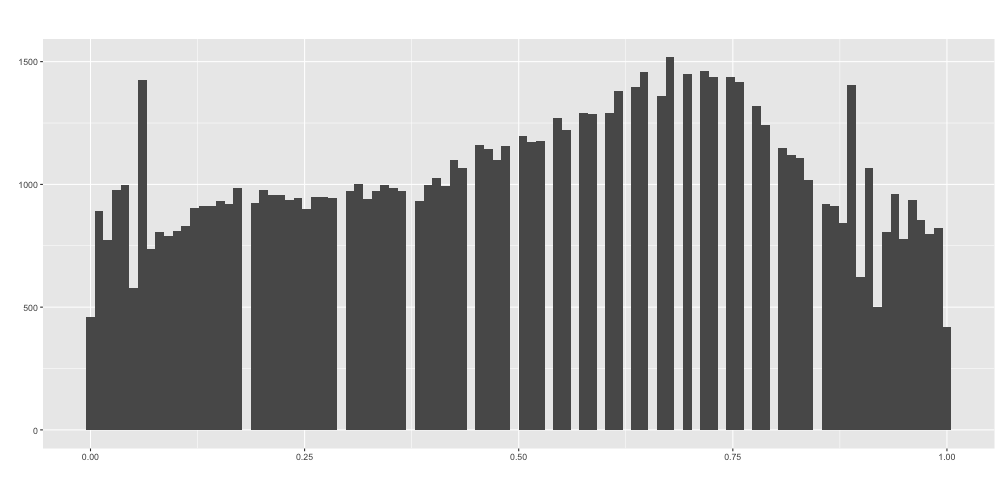

In [490]:
%%R -w 1000

ggplot(df) +
    aes(x=EPL_CANCER) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2220 rows containing non-finite outside the scale range (`stat_bin()`). 



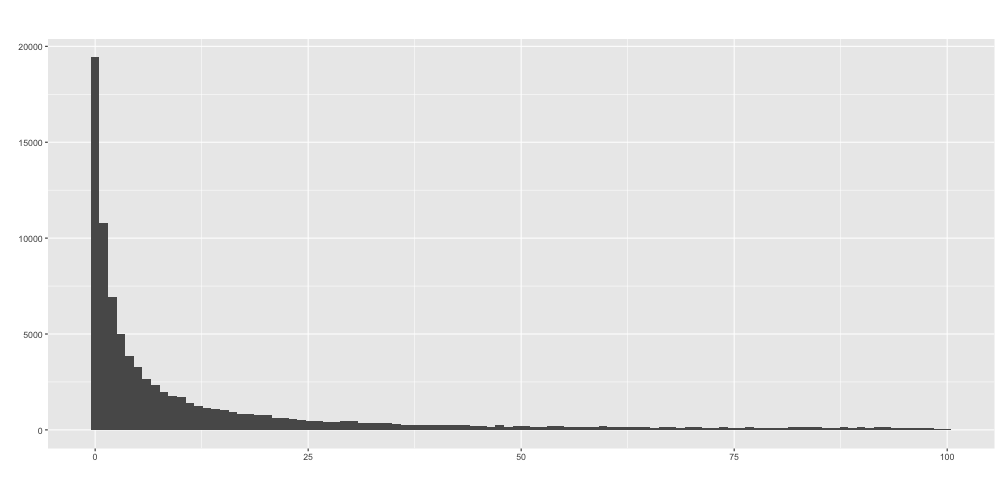

In [491]:
%%R -w 1000

ggplot(df) +
    aes(x=E_AFAM) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")


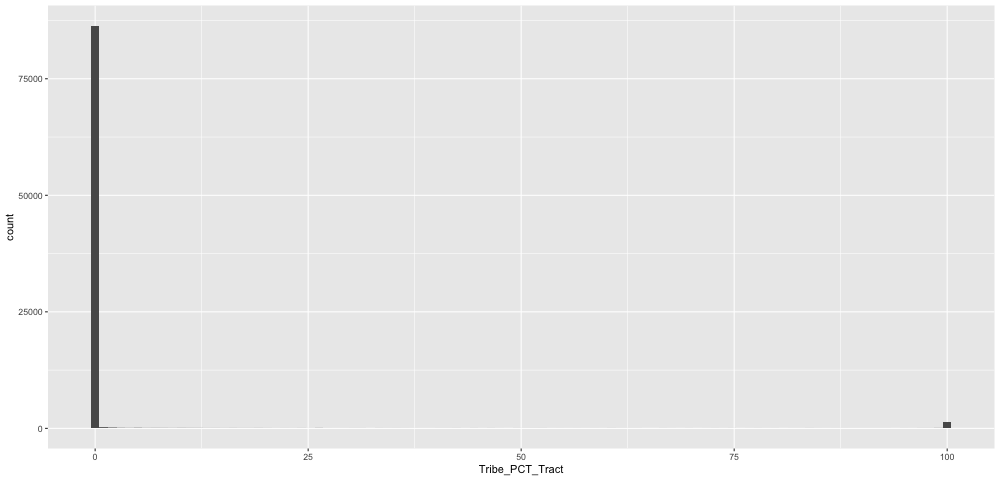

In [492]:
%%R -w 1000

ggplot(df) +
    aes(x=Tribe_PCT_Tract) +
    geom_histogram(bins=100) 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2364 rows containing non-finite outside the scale range (`stat_bin()`). 



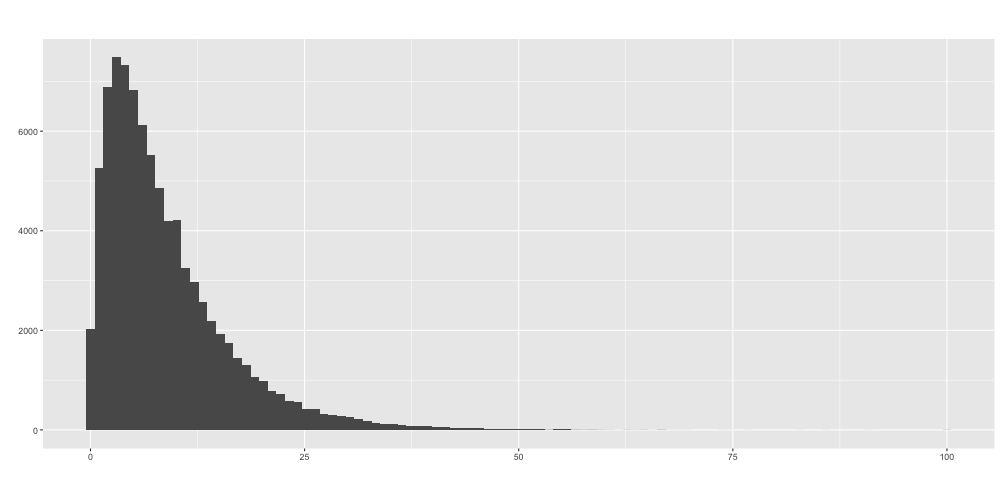

In [493]:
%%R -w 1000

ggplot(df) +
    aes(x=E_UNINSUR) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")        

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2364 rows containing non-finite outside the scale range (`stat_bin()`). 



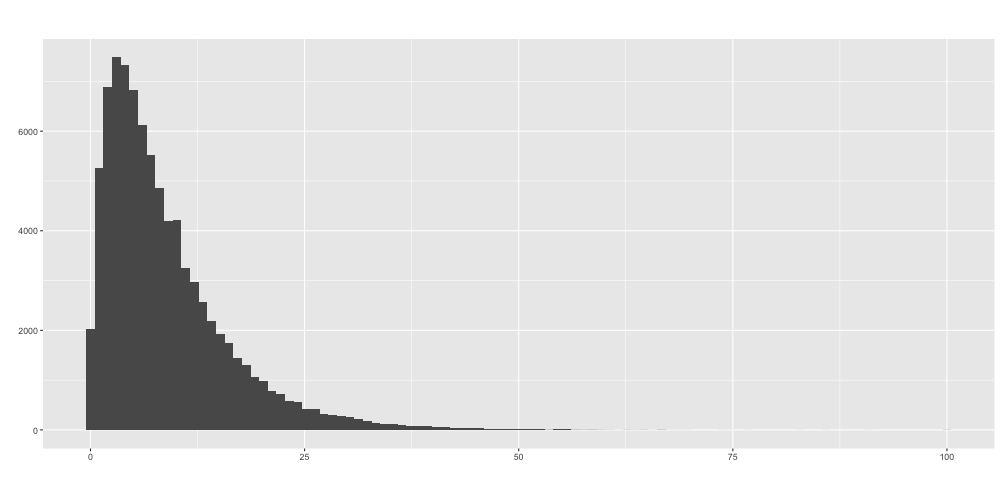

In [494]:
%%R -w 1000

ggplot(df) +
    aes(x=E_UNINSUR) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")   

In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=withdrawal_volume_million_gallons) +
    geom_histogram(bins=30) +
    facet_wrap(~State) +
    labs(title=str_wrap("[NOT FOR PUB] Texas, Louisiana and Floria are some of the states that have higher-withdrawing natural gas power plants", width=75), 
         subtitle="Water usage by U.S. natural gas power plants according to the EIA", x="Water withdrawal volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=discharge_volume_million_gallons, y=1) +
    geom_jitter() +
    labs(title=str_wrap("[NOT FOR PUB] A sub-section of power plants discharge huge amounts of water", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water discharge volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=discharge_volume_million_gallons, y=1) +
    geom_jitter() +
    facet_wrap(~State) +
    labs(title=str_wrap("[NOT FOR PUB] A sub-section of power plants discharge huge amounts of water", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water discharge volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=consumption_volume_million_gallons, y=1) +
    geom_jitter() +
    labs(title=str_wrap("[NOT FOR PUB] Consumption volume follows a similar pattern, but the power plants are closer together here than in the withdrawal and discharge rates plots - and the outliers consume much less water than the outliers (in the other plots) withdraw or discharge", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water consumption volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=consumption_volume_million_gallons, y=1) +
    geom_jitter() +
    facet_wrap(~State) +
    labs(title=str_wrap("[NOT FOR PUB] Florida, Louisiana and Georgia have some natural gas power plants that consume more water", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water consumption volume (million gallons)", y="Number of power plants")
